## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


## Reading and Understanding Data

In [200]:
# read the data
df = pd.read_csv("day.csv")
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [169]:
#Checking the rows and columns i.e shape of data
df.shape

(730, 16)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [171]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


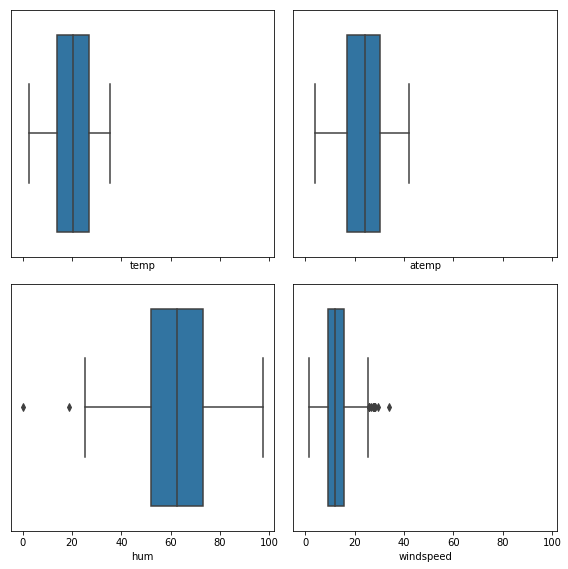

In [173]:
# Performing an EDA
#Box plots for the numerical variables
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.boxplot(df.temp,  ax=axes[0, 0])
sns.boxplot(df.atemp,  ax=axes[0, 1])
sns.boxplot(df.hum,   ax=axes[1, 0])
sns.boxplot(df.windspeed,  ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

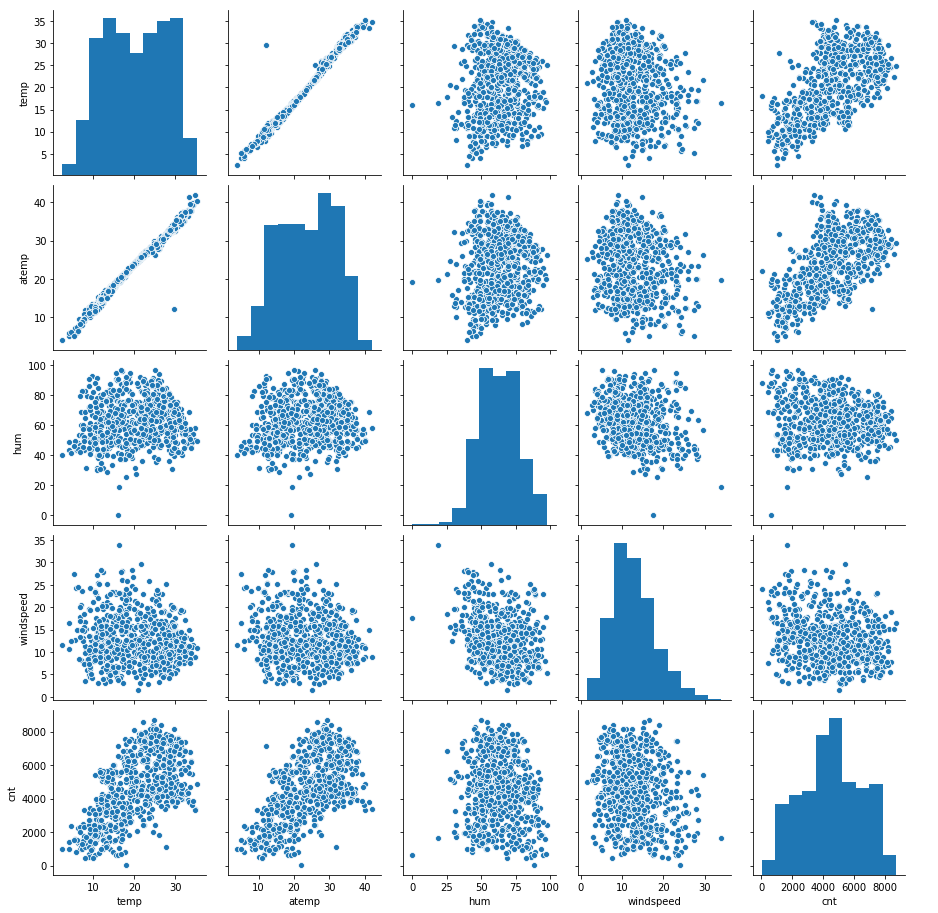

In [174]:
#Pairplot for the numerical variables. Correlation checking
sns.pairplot(df, vars = ['temp','atemp','hum','windspeed','cnt'])

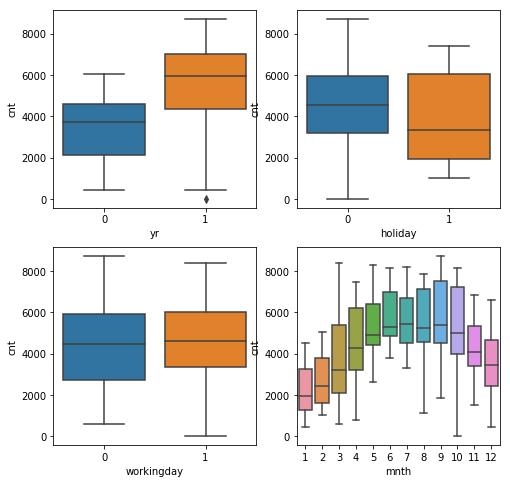

In [175]:
# box plot for categorical variables
f, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.boxplot(x = df.yr, y = df.cnt,  ax=axes[0, 0])
sns.boxplot(df.holiday, y = df.cnt, ax=axes[0, 1])
sns.boxplot(df.workingday,y = df.cnt,  ax=axes[1, 0])
sns.boxplot(df.mnth,y = df.cnt,  ax=axes[1, 1])



## 2. Preparing Data for Modelling

In [298]:
# Printing the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [299]:
# Removing unecessary columns
df1 = df.drop(columns = ['instant','dteday','casual','registered'])
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [300]:
# We ill be creating dummy values for the categorical variables, before that changing the data type of the categorical variables to object
df1['season'] = df1['season'].apply(str)
df1['weathersit'] = df1['weathersit'].apply(str)
df1['weekday'] = df1['weekday'].apply(str)
df1['mnth'] = df1['mnth'].apply(str)
df1.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [301]:
# Encoding Month
df1.loc[df1.mnth =='1','mnth'] ="Jan"
df1.loc[df1.mnth =='2','mnth'] ="Feb"
df1.loc[df1.mnth =='3','mnth'] ="Mar"
df1.loc[df1.mnth =='4','mnth'] ="Apr"
df1.loc[df1.mnth =='5','mnth'] ="May"
df1.loc[df1.mnth =='6','mnth'] ="Jun"
df1.loc[df1.mnth =='7','mnth'] ="Jul"
df1.loc[df1.mnth =='8','mnth'] ="Aug"
df1.loc[df1.mnth =='9','mnth'] ="Sep"
df1.loc[df1.mnth =='10','mnth'] ="Oct"
df1.loc[df1.mnth =='11','mnth'] ="Nov"
df1.loc[df1.mnth =='12','mnth'] ="Dec"

In [302]:
# Encoding Season
df1.loc[df1.season =='1','season'] ="Spring"
df1.loc[df1.season =='2','season'] ="Summer"
df1.loc[df1.season =='3','season'] ="Fall"
df1.loc[df1.season =='4','season'] ="Winter"

In [303]:
# Encoding Weathersit
df1.loc[df1.weathersit =='1','weathersit'] ="Clear"
df1.loc[df1.weathersit =='2','weathersit'] ="Mist"
df1.loc[df1.weathersit =='3','weathersit'] ="Light Snow"
df1.loc[df1.weathersit =='4','weathersit'] ="Heavy Rain"

In [304]:
# Encoding weekday
df1.loc[df1.weekday =='0','weekday'] ="Sunday"
df1.loc[df1.weekday =='6','weekday'] ="Monday"
df1.loc[df1.weekday =='1','weekday'] ="Tuesday"
df1.loc[df1.weekday =='2','weekday'] ="Wednesday"
df1.loc[df1.weekday =='3','weekday'] ="Thursday"
df1.loc[df1.weekday =='4','weekday'] ="Friday"
df1.loc[df1.weekday =='5','weekday'] ="Saturday"


In [305]:
#Creating Dummies For Month, season, weather_sit
season_cat = pd.get_dummies(df1['season'],prefix = 'season',drop_first ='True')
df1 = pd.concat((df1,season_cat),axis=1)
weathersit_cat = pd.get_dummies(df1['weathersit'],prefix = 'weathersit',drop_first ='True')
df1 = pd.concat((df1,weathersit_cat),axis=1)
weekday_cat = pd.get_dummies(df1['weekday'],prefix = 'weekday',drop_first ='True')
df1 = pd.concat((df1,weekday_cat),axis=1)
mnth_cat = pd.get_dummies(df1['mnth'],prefix = 'mnth',drop_first ='True')
df1 = pd.concat((df1,mnth_cat),axis=1)

In [306]:
df1 = df1.drop(columns = ['mnth','weekday','weathersit','season'])
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [307]:
# Checing the collumns added after creating the dummy variables
df1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow', 'weathersit_Mist', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep'],
      dtype='object')

In [308]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [309]:
df1.shape 

(730, 30)

### Divide the Data into train and test

In [310]:
# Putting feature variable to X
X = df1
X = X.drop(columns = 'cnt')
print(X.shape)
print(df1.shape)

(730, 29)
(730, 30)


In [311]:
y = pd.DataFrame(df1['cnt'])

In [312]:
# Splitting into train and test
df_train, df_test = train_test_split(df1, train_size=0.7 , random_state=100)

In [313]:
from sklearn.preprocessing import MinMaxScaler

In [314]:
scaler = MinMaxScaler()
#num_vars = ['temp','hum','atemp','windspeed','cnt']
scaler.fit_transform(df1)
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


### 3. Training the model

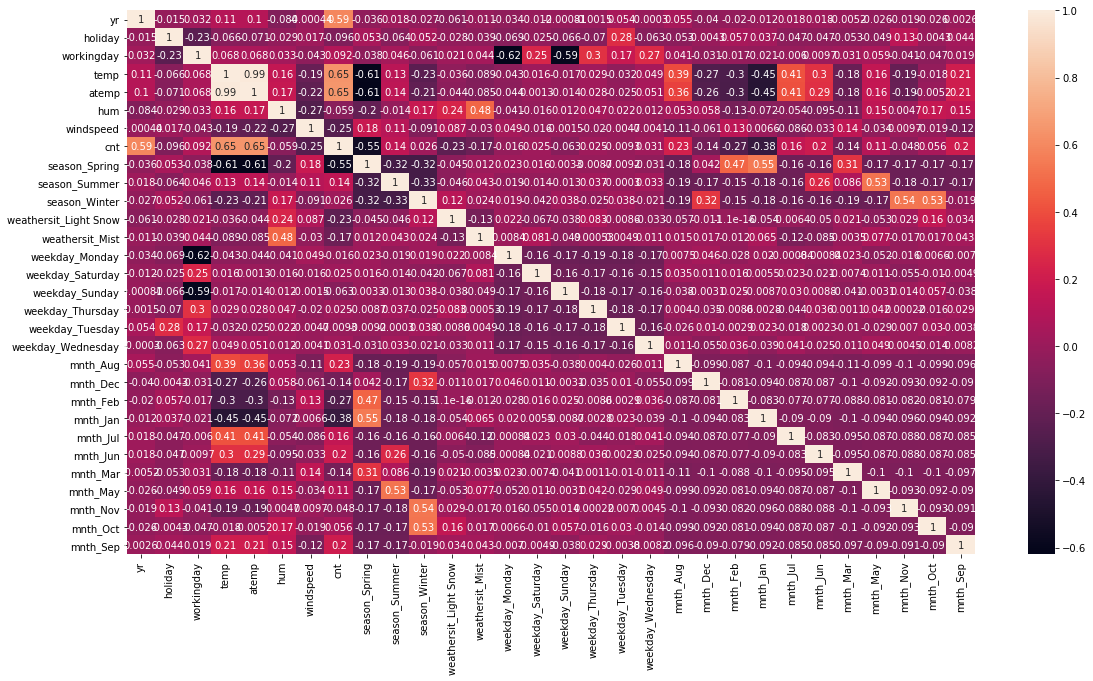

In [315]:
# Heatmap
plt.figure(figsize = (19,10))
sns.heatmap(df_train.corr(),annot = True)
plt.show()

In [375]:
y_train= df_train.pop("cnt")
x_train = df_train

KeyError: 'cnt'

In [376]:
from sklearn.feature_selection import RFE
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
rfe = RFE(lm, 25)
rfe = rfe.fit(x_train.astype(float), y_train)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', False, 3),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 2),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 4),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1)]

In [377]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'weathersit_Light Snow',
       'weathersit_Mist', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep'],
      dtype='object')

In [378]:
x_train.columns[~rfe.support_]

Index(['atemp', 'hum', 'weekday_Thursday', 'mnth_Mar'], dtype='object')

## Build Model using RFE selected variables

In [379]:
# Creating x test dataframe with RFE selected variables
import statsmodels.api as sm
x_train_rfe = x_train[col]

In [380]:
# Add a constant
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [381]:
lr = sm.OLS(y_train, x_train_rfe).fit()

In [382]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.02e-181
Time:                        23:18:33   Log-Likelihood:                -4106.8
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     485   BIC:                             8370.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1556.30

In [383]:
x_train_new = x_train_rfe.drop(['holiday'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.02e-181
Time:                        23:18:33   Log-Likelihood:                -4106.8
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     485   BIC:                             8370.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1488.61

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [384]:
x_train_new = x_train_new.drop(['mnth_Oct'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     117.7
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          4.63e-182
Time:                        23:18:33   Log-Likelihood:                -4106.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     486   BIC:                             8363.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1474.16

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [385]:
x_train_new = x_train_new.drop(['weekday_Saturday'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.2
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.12e-183
Time:                        23:18:34   Log-Likelihood:                -4107.1
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     487   BIC:                             8358.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1503.87

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [386]:
x_train_new = x_train_new.drop(['mnth_Jun'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.56e-184
Time:                        23:18:35   Log-Likelihood:                -4107.3
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     488   BIC:                             8352.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1480.37

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [387]:
x_train_new = x_train_new.drop(['mnth_Aug'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.21e-185
Time:                        23:18:36   Log-Likelihood:                -4107.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     489   BIC:                             8346.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1533.77

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [388]:
x_train_new = x_train_new.drop(['mnth_May'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     143.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.88e-186
Time:                        23:18:37   Log-Likelihood:                -4107.8
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     490   BIC:                             8340.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1489.84

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [389]:
x_train_new = x_train_new.drop(['weekday_Sunday'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.86e-187
Time:                        23:18:38   Log-Likelihood:                -4108.4
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     491   BIC:                             8335.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1753.44

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [390]:
x_train_new = x_train_new.drop(['weekday_Wednesday'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.48e-187
Time:                        23:18:41   Log-Likelihood:                -4109.2
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     492   BIC:                             8331.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1756.98

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [391]:
x_train_new = x_train_new.drop(['season_Summer'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          9.59e-188
Time:                        23:18:41   Log-Likelihood:                -4111.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     493   BIC:                             8329.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2147.19

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [392]:
x_train_new = x_train_new.drop(['weekday_Tuesday'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.2
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.53e-188
Time:                        23:18:42   Log-Likelihood:                -4113.1
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     494   BIC:                             8326.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2119.41

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [393]:
x_train_new = x_train_new.drop(['mnth_Feb'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.88e-188
Time:                        23:18:44   Log-Likelihood:                -4115.2
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2012.82

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [394]:
x_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Light Snow', 'weathersit_Mist',
       'weekday_Monday', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep'],
      dtype='object')

In [395]:
x_vif_cols  = ['yr', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Light Snow', 'weathersit_Mist',
       'weekday_Monday', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep']
x_vif = pd.DataFrame(x_train_new[x_vif_cols])
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_vif.columns
vif['VIF']= [variance_inflation_factor(x_vif.values,i) for i in range(x_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,2.07
1,workingday,4.67
2,temp,8.06
3,windspeed,5.96
4,season_Spring,2.51
5,season_Winter,2.59
6,weathersit_Light Snow,1.09
7,weathersit_Mist,1.56
8,weekday_Monday,1.84
9,mnth_Dec,1.48


In [396]:
x_train_new = x_train_new.drop(['windspeed'],axis = 1)
x_train_lm = sm.add_constant(x_train_new)
lr1 = sm.OLS(y_train, x_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.93e-181
Time:                        23:18:47   Log-Likelihood:                -4134.6
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     496   BIC:                             8357.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1249.16

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Residual Analysis of the trained data

In [397]:
y_train_cnt = lr1.predict(x_train_lm)

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

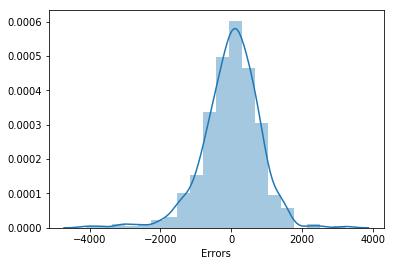

In [398]:
fig= plt.figure()
sns.distplot((y_train - y_train_cnt),bins=20)
plt.xlabel("Errors")



## Making Predictions

In [399]:
x_train_new.dtypes

const                    float64
yr                         int64
workingday                 int64
temp                     float64
season_Spring              uint8
season_Winter              uint8
weathersit_Light Snow      uint8
weathersit_Mist            uint8
weekday_Monday             uint8
mnth_Dec                   uint8
mnth_Jan                   uint8
mnth_Jul                   uint8
mnth_Nov                   uint8
mnth_Sep                   uint8
dtype: object

In [400]:
y_test = df_test.pop('cnt')
x_test = df_test

In [401]:
x_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'season_Spring', 'season_Winter',
       'weathersit_Light Snow', 'weathersit_Mist', 'weekday_Monday',
       'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep'],
      dtype='object')

In [404]:
# Using our model to make predications

# Create a new x_test with relevant variables
x_test_new = pd.DataFrame(x_test,columns =[ 'yr', 'workingday', 'temp', 'season_Spring', 'season_Winter',
       'weathersit_Light Snow', 'weathersit_Mist', 'weekday_Monday',
       'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep'])
x_test_new = sm.add_constant(x_test_new)

C:\Users\amritha.sharma\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [405]:
#Making Prediction
y_pred_new = lr1.predict(x_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

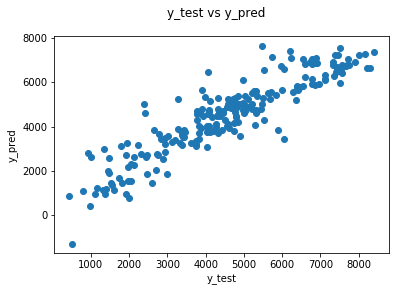

In [407]:
fig= plt.figure()
plt.scatter(y_test,y_pred_new)
fig.suptitle('y_test vs y_pred')
plt.xlabel("y_test")
plt.ylabel("y_pred")


Text(0.5, 0, 'Index')

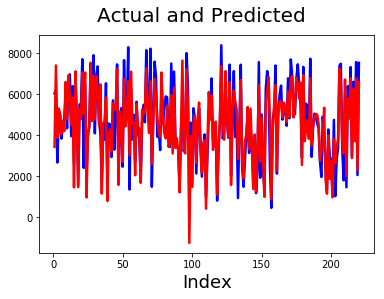

In [408]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,221,1)] # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_new, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18) 

Text(0, 0.5, 'ytest-ypred')

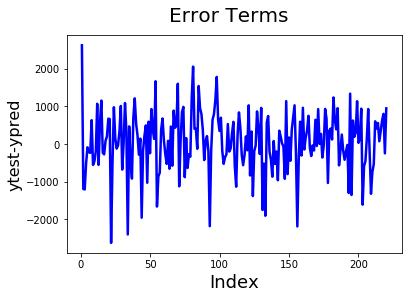

In [409]:
# Error terms
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_new, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16) 

-The R square for the train model is 83.0 which means the model is efficient
- 'yr', 'workingday', 'temp', 'season_Spring', 'season_Winter',
  'weathersit_Light Snow', 'weathersit_Mist', 'weekday_Monday',
  'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep'are the variables on which ####the model depends
-- we can observe a high correlation between the temperature as well

## The overlapping between y_pred vs y_actual sepicts the accuracy of the model